# Higher-order network motif analysis in hypergraphs

Motifs are small recurring patterns of subgraphs that are overrepresented in a network. Motif analysis has established itself as a fundamental tool in network science to describe networked systems at their microscale, identifying their structural and functional building blocks. 

We provide an implementation for higher-order motif analysis, extracting overabundant subgraphs of nodes connected by higher-order interactions, as originally defined in *Lotito, Q.F., Musciotto, F., Montresor, A. et al. Higher-order motif analysis in hypergraphs. Commun Phys 5, 79 (2022).*

In [1]:
import sys
sys.path.append("..")

import hypergraphx as hgx
from hypergraphx.motifs import compute_motifs
from hypergraphx.readwrite import load_hypergraph
from hypergraphx.viz import plot_motifs

Here we load the dataset "high school" from our data repository

In [2]:
H = load_hypergraph("../test_data/hs/hs.json")

The function *compute_motifs* accepts the hypergraph H as a parameter, the order of the motif analysis (i.e., the size of the patterns in terms of the number of nodes), and the runs of the configuration model for computing the score of the motifs (relative abundance). Zero runs of the configuration model corresponds to counting patterns in the input hypergraphs. For example, here we set five runs for the configuration model. Five runs is a very low number, but it is enough for the purpose of this tutorial.

In [3]:
motifs = compute_motifs(H, order=3, runs_config_model=5)

Computing observed motifs of order 3...
Computing config model motifs of order 3. Step: 1
75890 steps completed.
Computing config model motifs of order 3. Step: 2
75890 steps completed.
Computing config model motifs of order 3. Step: 3
75890 steps completed.
Computing config model motifs of order 3. Step: 4
75890 steps completed.
Computing config model motifs of order 3. Step: 5
75890 steps completed.


The output object stores the count of the patterns on the input hypergraph, the count of the patterns on the samples from the configuration model and the relative abundance score of the motifs.

In [4]:
print(motifs.keys())

dict_keys(['observed', 'config_model', 'norm_delta'])


In [5]:
motifs['observed']

[(((1, 2), (1, 2, 3)), 58),
 (((1, 2), (1, 2, 3), (1, 3)), 231),
 (((1, 2), (1, 2, 3), (1, 3), (2, 3)), 1802),
 (((1, 2), (1, 3)), 115709),
 (((1, 2), (1, 3), (2, 3)), 28029),
 (((1, 2, 3),), 0)]

In [6]:
print(motifs['norm_delta'])

[(((1, 2), (1, 2, 3)), -0.4652842147023752), (((1, 2), (1, 2, 3), (1, 3)), 0.188856775296827), (((1, 2), (1, 2, 3), (1, 3), (2, 3)), 0.558243887253424), (((1, 2), (1, 3)), -0.08933023091359925), (((1, 2), (1, 3), (2, 3)), 0.33579193046372696), (((1, 2, 3),), -0.5616683804504493)]


In [7]:
motif_profile = [i[1] for i in motifs['norm_delta']]


Let's plot the profile. Please keep in mind that the x-axis of the plot follows the original paper convention, displaying first the patterns involving lower-order interactions only.

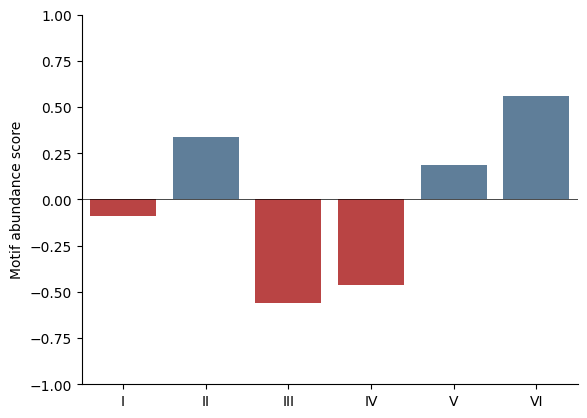

In [8]:
plot_motifs(motif_profile)